<a href="https://colab.research.google.com/github/jeremywanjohi/AviPro-Mobile-APP/blob/main/AI_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Update package lists
!apt-get update -qq

# Install SUMO, SUMO tools, and documentation
!apt-get install -y sumo sumo-tools sumo-doc

# Install Python libraries
!pip install -q sumolib matplotlib pandas


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  binfmt-support fastjar fonts-roboto-unhinted jarwrapper javascript-common libcoin80c
  libcollada-dom2.5-dp0 libfox-1.6-0 libgdal30 libglu1-mesa libjs-openlayers liblua5.2-0
  libopenscenegraph161 libopenthreads21 libpoppler-glib8 libproj22 proj-bin
Suggested packages:
  apache2 | lighttpd | httpd libopenal0a libsimage-dev libbullet2
The following NEW packages will be installed:
  binfmt-support fastjar fonts-roboto-unhinted jarwrapper javascript-common libcoin80c
  libcollada-dom2.5-dp0 libfox-1.6-0 libgdal30 libglu1-mesa libjs-openlayers liblua5.2-0
  libopenscenegraph161 libopenthreads21 libpoppler-glib8 libproj22 proj-bin sumo sumo-doc
  sumo-tool

In [ ]:
import os
import sys

# Define SUMO installation path
sumo_home = '/usr/share/sumo'

# Check if SUMO_HOME exists
if os.path.exists(sumo_home):
    os.environ['SUMO_HOME'] = sumo_home
    print(f"SUMO_HOME set to: {sumo_home}")
else:
    raise EnvironmentError("SUMO_HOME path not found. Please verify SUMO installation.")

# Append SUMO's tools directory to Python path
tools = os.path.join(sumo_home, "tools")
if tools not in sys.path:
    sys.path.append(tools)
    print(f"Appended SUMO tools path to sys.path: {tools}")
else:
    print("SUMO tools path already in sys.path.")


SUMO_HOME set to: /usr/share/sumo
Appended SUMO tools path to sys.path: /usr/share/sumo/tools


In [ ]:
import os

# Create network directory
network_dir = "/content/sumo_network"
os.makedirs(network_dir, exist_ok=True)

# Define nodes for two intersections
nodes = """
<nodes>
    <node id="A" x="0" y="0" type="priority"/>
    <node id="B" x="0" y="1000" type="traffic_light"/>
    <node id="C" x="1000" y="1000" type="priority"/>
    <node id="D" x="1000" y="0" type="traffic_light"/>
</nodes>
"""

# Save nodes to file
with open(os.path.join(network_dir, "nodes.nod.xml"), "w") as f:
    f.write(nodes)

print("Nodes defined and saved successfully.")


Nodes defined and saved successfully.


In [ ]:
# Define edges connecting the nodes
edges = """
<edges>
    <edge id="AtoB" from="A" to="B" priority="1" numLanes="2" speed="13.89"/>
    <edge id="BtoC" from="B" to="C" priority="1" numLanes="2" speed="13.89"/>
    <edge id="CtoD" from="C" to="D" priority="1" numLanes="2" speed="13.89"/>
    <edge id="DtoA" from="D" to="A" priority="1" numLanes="2" speed="13.89"/>
</edges>
"""

# Save edges to file
with open(os.path.join(network_dir, "edges.edg.xml"), "w") as f:
    f.write(edges)

print("Edges defined and saved successfully.")


Edges defined and saved successfully.


In [ ]:
# Define vehicle types
vtypes = """
<types>
    <type id="car" vClass="passenger" color="1,0,0" accel="2.6" decel="4.5" \
length="5.0" minGap="2.5" maxSpeed="13.89"/>
</types>
"""

# Save vehicle types to file
with open(os.path.join(network_dir, "vtypes.type.xml"), "w") as f:
    f.write(vtypes)

print("Vehicle types defined and saved successfully.")


Vehicle types defined and saved successfully.


In [ ]:
# Generate the network without automatic traffic light logic
!netconvert --node-files /content/sumo_network/nodes.nod.xml \
            --edge-files /content/sumo_network/edges.edg.xml \
            --type-files /content/sumo_network/vtypes.type.xml \
            --tls.guess=false \
            --output-file /content/sumo_network/simple.net.xml

print("Network generated successfully.")


Success.
Network generated successfully.


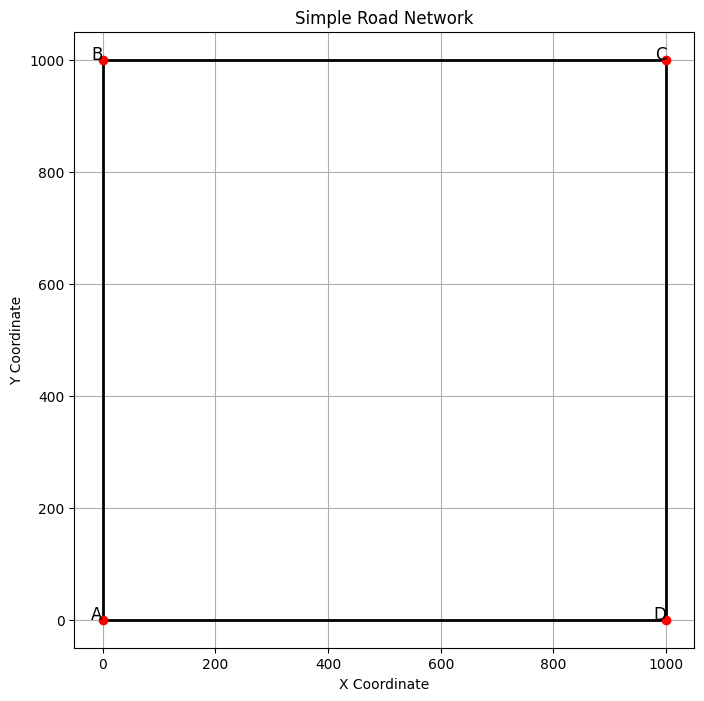

In [ ]:
import matplotlib.pyplot as plt
import sumolib

# Load the network
net = sumolib.net.readNet('/content/sumo_network/simple.net.xml')

# Extract node positions
nodes = net.getNodes()
node_positions = {node.getID(): (node.getCoord()[0], node.getCoord()[1]) for node in nodes}

# Extract edges
edges = net.getEdges()

# Plot the network
plt.figure(figsize=(8,8))
for edge in edges:
    from_node = edge.getFromNode()
    to_node = edge.getToNode()
    x_values = [from_node.getCoord()[0], to_node.getCoord()[0]]
    y_values = [from_node.getCoord()[1], to_node.getCoord()[1]]
    plt.plot(x_values, y_values, 'k-', linewidth=2)

# Annotate nodes
for node_id, (x, y) in node_positions.items():
    plt.plot(x, y, 'ro')  # Node as red dot
    plt.text(x, y, node_id, fontsize=12, ha='right')

plt.title('Simple Road Network')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)
plt.show()


In [ ]:
# Define routes
routes = """
<routes>
    <vType id="car" vClass="passenger" color="1,0,0" accel="2.6" decel="4.5" \
length="5.0" minGap="2.5" maxSpeed="13.89"/>

    <route id="route0" edges="AtoB BtoC CtoD DtoA"/>

    <!-- Vehicle flows -->
    <flow id="flow0" type="car" route="route0" begin="0" end="3000" period="0.2"/>
</routes>
"""

# Save routes to file
with open(os.path.join(network_dir, "routes.rou.xml"), "w") as f:
    f.write(routes)

print("Routes defined and saved successfully.")


Routes defined and saved successfully.


In [ ]:
# Define SUMO configuration
sumocfg = """
<configuration>
    <input>
        <net-file value="/content/sumo_network/simple.net.xml"/>
        <route-files value="/content/sumo_network/routes.rou.xml"/>
        <additional-files value="/content/sumo_network/additional.add.xml"/>
    </input>
    <time>
        <begin value="0"/>
        <end value="3600"/> <!-- 1 hour -->
        <step-length value="1"/>
    </time>
    <report>
        <verbose value="true"/>
        <no-step-log value="true"/>
    </report>
    <output>
        <emission-output value="/content/sumo_network/emissions.xml"/>
    </output>
</configuration>
"""

# Save SUMO configuration to file
with open(os.path.join(network_dir, "simulation_fixed.sumocfg"), "w") as f:
    f.write(sumocfg)

print("SUMO configuration file created successfully.")


SUMO configuration file created successfully.


In [ ]:
# Define traffic lights with fixed phases
traffic_lights = """
<additional>
  <tlLogic id="B" type="static" programID="B_0" offset="0">
    <phase duration="30" state="GrGr"/>
    <phase duration="5" state="yryr"/>
    <phase duration="30" state="rGrG"/>
    <phase duration="5" state="ryry"/>
  </tlLogic>
  <tlLogic id="D" type="static" programID="D_0" offset="0">
    <phase duration="30" state="GrGr"/>
    <phase duration="5" state="yryr"/>
    <phase duration="30" state="rGrG"/>
    <phase duration="5" state="ryry"/>
  </tlLogic>
</additional>

"""

# Save traffic lights to file
with open(os.path.join(network_dir, "additional.add.xml"), "w") as f:
    f.write(traffic_lights)

print("Traffic lights defined and saved successfully.")


Traffic lights defined and saved successfully.


In [ ]:
!sumo -c /content/sumo_network/simulation_fixed.sumocfg


Loading net-file from '/content/sumo_network/simple.net.xml' ... done (2ms).
Loading additional-files from '/content/sumo_network/additional.add.xml' ... 
done (0ms).
Loading done.
Simulation version 1.12.0 started with time: 0.00
Simulation ended at time: 3600.00
Reason: The final simulation step has been reached.
Performance: 
 Duration: 31.05s
 Real time factor: 115.931
 UPS: 11702.283193
Vehicles: 
 Inserted: 993 (Loaded: 15000)
 Running: 113
 Waiting: 14007



In [ ]:
import traci
import sumolib
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import time

# Path to the SUMO configuration file
sumo_cfg = "/content/sumo_network/simulation_fixed.sumocfg"

# Function to start TraCI and handle exceptions
def start_traci(sumo_cmd):
    try:
        traci.start(sumo_cmd)
        print("TraCI connection started successfully.")
    except Exception as e:
        print(f"Failed to start TraCI: {e}")
        raise e

# Define SUMO command
sumo_binary = "sumo"  # Ensure 'sumo' is in PATH
sumo_cmd = [sumo_binary, "-c", sumo_cfg, "--no-step-log", "--no-warnings"]

# Start TraCI
start_traci(sumo_cmd)

# Initialize data storage
vehicle_counts = []
waiting_vehicles_list = []
time_steps = []

# Retrieve and print traffic light IDs
net = sumolib.net.readNet('/content/sumo_network/simple.net.xml')
traffic_lights = net.getTrafficLights()
traffic_light_ids = [tl.getID() for tl in traffic_lights]
print("Traffic Light IDs:", traffic_light_ids)

# Define simulation duration
simulation_steps = 3600  # 1 hour, step length is 1 second

for step in range(simulation_steps):
    try:
        traci.simulationStep()  # Advance simulation by one step

        # Collect data
        vehicle_count = traci.simulation.getMinExpectedNumber()

        # Sum waiting times for all vehicles
        vehicle_ids = traci.vehicle.getIDList()
        waiting_time = sum([traci.vehicle.getWaitingTime(vehicle_id) for vehicle_id in traci.vehicle.getIDList()])

        vehicle_counts.append(vehicle_count)
        waiting_vehicles_list.append(waiting_time)
        time_steps.append(step)

        # Optional: Print progress every 600 steps (10 minutes)
        if (step + 1) % 600 == 0:
            print(f"Step: {step + 1}, Vehicles: {vehicle_count}, Total Waiting Time: {waiting_time}")
    except KeyboardInterrupt:
        print("Simulation interrupted by user.")
        break
    except Exception as e:
        print(f"Error during simulation at step {step}: {e}")
        break


# Close TraCI connection
traci.close()
print("Simulation completed.")


 Retrying in 1 seconds
TraCI connection started successfully.
Traffic Light IDs: ['B', 'D']
Step: 600, Vehicles: 2932, Total Waiting Time: 252.0
Step: 1200, Vehicles: 5757, Total Waiting Time: 11.0
Step: 1800, Vehicles: 8599, Total Waiting Time: 129.0
Step: 2400, Vehicles: 11437, Total Waiting Time: 174.0
Step: 3000, Vehicles: 14273, Total Waiting Time: 236.0
Step: 3600, Vehicles: 14120, Total Waiting Time: 285.0
Simulation completed.


In [ ]:
# Create a DataFrame from collected data
data = {
    'Time (s)': time_steps,
    'Vehicle Count': vehicle_counts,
    'Waiting Time (s)': waiting_vehicles_list
}

df = pd.DataFrame(data)
df.head()


,Time (s),Vehicle Count,Waiting Time (s)
0,0,2,0.0
1,1,7,0.0
2,2,12,0.0
3,3,17,0.0
4,4,22,0.0


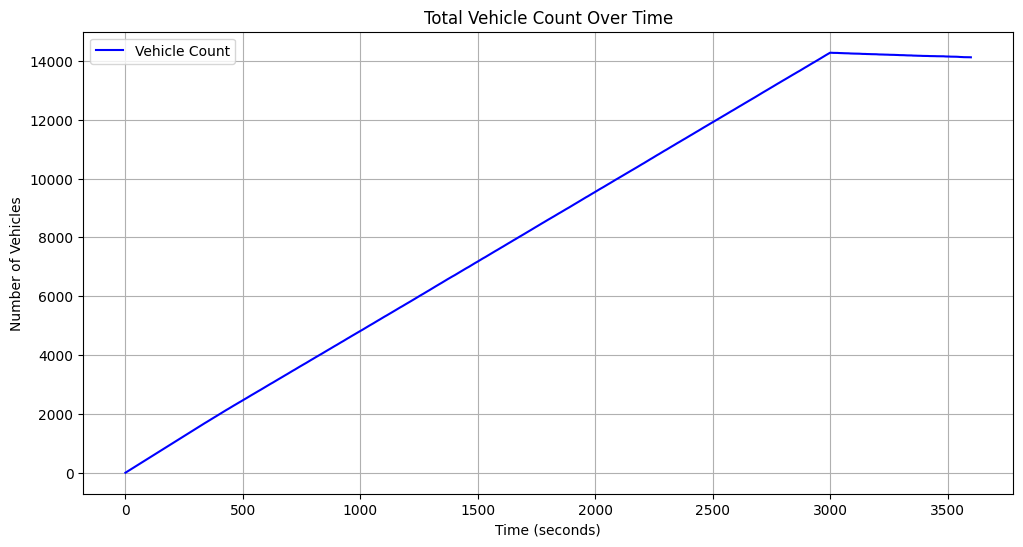

In [ ]:
# Plot Vehicle Count Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Time (s)'], df['Vehicle Count'], label='Vehicle Count', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Vehicles')
plt.title('Total Vehicle Count Over Time')
plt.legend()
plt.grid(True)
plt.show()


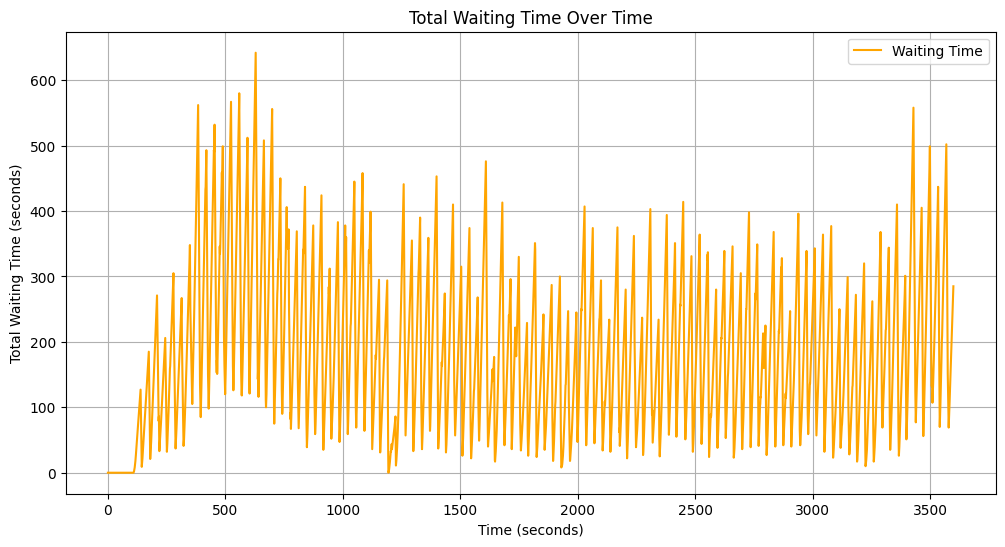

In [ ]:
# Plot Waiting Time Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Time (s)'], df['Waiting Time (s)'], label='Waiting Time', color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Total Waiting Time (seconds)')
plt.title('Total Waiting Time Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
!pip install stable-baselines3
!pip install torch



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 35.5 MB/s eta 0:00:00


In [ ]:
!pip install "stable-baselines3[extra]>=2.0.0" gymnasium shimmy


INFO: pip is looking at multiple versions of shimmy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 41.5 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446661 sha256=8c5295e5e60457507529eabcd01e0454b9855d11f58725b71ef091d498b0af81
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [ ]:
import traci
import gymnasium as gym
from stable_baselines3 import DQN
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt

# Define the TrafficSignalEnv class
class TrafficSignalEnv(gym.Env):
    def __init__(self, traffic_light_id="B", max_steps=1000):
        super(TrafficSignalEnv, self).__init__()
        self.traffic_light_id = traffic_light_id
        self.max_steps = max_steps
        self.step_count = 0

        # Define action and observation space
        self.action_space = spaces.Discrete(2)  # Actions: 0 (green), 1 (red)
        self.observation_space = spaces.Box(low=0, high=100, shape=(1,), dtype=np.float32)

    def reset(self, seed=None, options=None):
        self.step_count = 0
        return self._get_state(), {}

    def _get_state(self):
        # Get the number of vehicles waiting at the traffic light
        vehicle_count = traci.edge.getLastStepVehicleNumber("AtoB")  # Adjust edge ID as necessary
        return np.array([vehicle_count], dtype=np.float32)

    def step(self, action):
        # Take the chosen action
        self._take_action(action)

        # Advance the simulation by one step
        traci.simulationStep()

        # Observe the new state
        state = self._get_state()

        # Define reward: negative vehicle count to incentivize clearing the intersection
        reward = -traci.edge.getWaitingTime("AtoB")  # Minimize vehicles waiting at the light

        # Update step count and check if done
        self.step_count += 1
        done = self.step_count >= self.max_steps

        return state, reward, done, False, {}

    def _take_action(self, action):
        # Convert action to integer in case it's a numpy array
        action = int(action)

        # Define traffic light phases for green and red
        phases = {0: "GGrr", 1: "rrGG"}  # Green for 'AtoB', red for 'BtoC'
        traci.trafficlight.setRedYellowGreenState(self.traffic_light_id, phases[action])

    def close(self):
        # Ensure TraCI connection is closed only if it exists
        try:
            traci.close()
            print("TraCI connection closed.")
        except Exception as e:
            print("TraCI was not connected:", e)

# Function to start the SUMO simulation with TraCI
def start_traci():
    sumo_binary = "sumo"  # Replace with "sumo-gui" for visualization
    sumo_cmd = [sumo_binary, "-c", "/content/sumo_network/simulation_fixed.sumocfg", "--no-step-log", "--no-warnings"]
    try:
        traci.start(sumo_cmd)
        print("TraCI connection established.")
    except Exception as e:
        print(f"Failed to start TraCI: {e}")
        raise e

# Initialize environment
env = TrafficSignalEnv(traffic_light_id="B")

# Start TraCI once before training
start_traci()

# Initialize the DQN model
model = DQN("MlpPolicy", env, verbose=1, learning_rate=1e-3, gamma=0.99)

# Train the model within a try-finally block to ensure TraCI connection is managed
try:
    model.learn(total_timesteps=50000)  # Training for 10,000 steps

finally:
    # Ensure TraCI connection closes after training
    env.close()

# Function to start TraCI specifically for evaluation
def start_traci_for_evaluation():
    sumo_binary = "sumo"
    sumo_cmd = [sumo_binary, "-c", "/content/sumo_network/simulation_fixed.sumocfg", "--no-step-log", "--no-warnings"]
    try:
        traci.start(sumo_cmd)
        print("TraCI connection established for evaluation.")
    except Exception as e:
        print(f"Failed to start TraCI for evaluation: {e}")
        raise e

# Add to environment's reward function in the TrafficSignalEnv class
def _compute_reward(self):
    waiting_time = traci.edge.getWaitingTime("AtoB")

    # Reward based on inverse of waiting time (penalizes high waiting times)
    reward = -waiting_time
    return reward

# Function to run an evaluation episode and collect metrics
def record_metrics(env, model):
    # Start TraCI connection for evaluation
    start_traci_for_evaluation()

    obs = env.reset()[0]
    done = False
    waiting_times = []
    vehicle_counts = []
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, _, done, _, _ = env.step(action)

        # Log and record metrics
        vehicle_count = traci.edge.getLastStepVehicleNumber("AtoB")  # Adjust edge ID as needed
        waiting_time = traci.edge.getWaitingTime("AtoB")

        # Print/logging vehicle counts
        print(f"Timestep: {env.step_count}, Vehicle Count on AtoB: {vehicle_count}, Waiting Time: {waiting_time}")

        waiting_times.append(waiting_time)
        vehicle_counts.append(vehicle_count)

    # Close TraCI connection after evaluation
    env.close()

    # Plot waiting times
    plt.figure(figsize=(10, 5))
    plt.plot(waiting_times, label='Waiting Time')
    plt.xlabel('Timestep')
    plt.ylabel('Waiting Time (s)')
    plt.legend()
    plt.show()

    # Plot vehicle counts
    plt.figure(figsize=(10, 5))
    plt.plot(vehicle_counts, label='Vehicle Count')
    plt.xlabel('Timestep')
    plt.ylabel('Vehicle Count')
    plt.legend()
    plt.show()

# Run the metric recording function with logging
record_metrics(env, model)

 Retrying in 1 seconds
TraCI connection established.
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1e+03    |
|    ep_rew_mean      | -318     |
|    exploration_rate | 0.24     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 90       |
|    time_elapsed     | 43       |
|    total_timesteps  | 4000     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.151    |
|    n_updates        | 974      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 1e+03    |
|    ep_rew_mean      | -364     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 78       |
|    time_elapsed     | 102      |
|    total_ti

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
